<h1>Bioinformatics Project - Computational Drug Discovery

<h3>Download PaDEL-Descriptor

In [8]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-02-27 05:28:00--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-02-27 05:28:00--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.1’

padel.zip.1         100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2024-02-27 05:28:00 (186 MB/s) - ‘padel.zip.1’ saved [25768637/25768637]

--2024-02-27 05:28:00--  https://gi

In [9]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [2]:
'''Load in previous dataset'''
import pandas as pd
df = pd.read_csv('SARSCoronavirus_04_bioactivity_data_raw.csv')
df

,Unnamed: 0.1,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,2,2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
1,3,3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
2,5,5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
3,7,7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
4,8,8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...,...,...
72,81,81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.675718
73,82,82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,3.644548
74,83,83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.412289
75,84,84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.841638


In [3]:
'''Keep relevant columns: Canonical smiles, Chembl id'''
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [4]:
'''Show head of file of smiles'''
! cat molecule.smi | head -5

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
'''Length of file'''
! cat molecule.smi | wc -l

77


<h3>Calculate PaDEL descriptors

In [14]:
'''Calculate padel descriptors using padel.sh file'''
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [15]:
'''Calculate padel descriptors using padel.sh file'''
! bash padel.sh

Processing CHEMBL185698 in molecule.smi (1/77). 
Processing CHEMBL426082 in molecule.smi (2/77). 
Processing CHEMBL365134 in molecule.smi (3/77). Average speed: 2.42 s/mol.
Processing CHEMBL190743 in molecule.smi (4/77). Average speed: 1.35 s/mol.
Processing CHEMBL365469 in molecule.smi (5/77). Average speed: 1.16 s/mol.
Processing CHEMBL188983 in molecule.smi (6/77). Average speed: 0.94 s/mol.
Processing CHEMBL191575 in molecule.smi (7/77). Average speed: 1.02 s/mol.
Processing CHEMBL370923 in molecule.smi (8/77). Average speed: 0.90 s/mol.
Processing CHEMBL194398 in molecule.smi (9/77). Average speed: 1.06 s/mol.
Processing CHEMBL196635 in molecule.smi (10/77). Average speed: 0.81 s/mol.
Processing CHEMBL209287 in molecule.smi (11/77). Average speed: 0.80 s/mol.
Processing CHEMBL348660 in molecule.smi (13/77). Average speed: 0.69 s/mol.
Processing CHEMBL358279 in molecule.smi (12/77). Average speed: 0.75 s/mol.
Processing CHEMBL379727 in molecule.smi (14/77). Average speed: 0.66 s/mo

In [17]:
! ls -l

total 50524
-rw-r--r-- 1 root root   148177 Feb 27 05:28 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Feb 27 05:28 __MACOSX
-rw-r--r-- 1 root root     4625 Feb 27 05:28 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Feb 27 05:19 padel.sh
-rw-r--r-- 1 root root      231 Feb 27 05:28 padel.sh.1
-rw-r--r-- 1 root root 25768637 Feb 27 05:19 padel.zip
-rw-r--r-- 1 root root 25768637 Feb 27 05:28 padel.zip.1
drwxr-xr-x 1 root root     4096 Feb 23 14:26 sample_data
-rw-r--r-- 1 root root    10328 Feb 27 05:19 SARSCoronavirus_04_bioactivity_data_raw.csv


<h3>Preparing the X and Y Data Matrices

In [6]:
'''Read in file with calculated descriptors'''
df_X = pd.read_csv('descriptors_output.csv')
df_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL185698,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL426082,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL365134,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL190743,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL365469,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,CHEMBL2146517,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,CHEMBL187460,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,CHEMBL227075,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,CHEMBL363535,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
74,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
75,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<h3>Convert IC50 to pIC50

In [8]:
'''Set target'''
df_Y = df['pIC50']
df_Y

0     4.869666
1     4.882397
2     6.008774
3     6.022276
4     4.950782
        ...   
72    4.675718
73    3.644548
74    4.412289
75    4.841638
76    4.675718
Name: pIC50, Length: 77, dtype: float64

In [9]:
'''Concatenate dataframes'''
dataset3 = pd.concat([df_X,df_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.869666
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.882397
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.008774
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.022276
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.950782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.675718
73,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.644548
74,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.412289
75,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.841638


In [12]:
dataset3.to_csv('SARSCoronavirus_05_bioactivity_data_raw.csv', index=False)

<h3>Machine Learning

In [3]:
'''Read in dataset'''
df = pd.read_csv('SARSCoronavirus_05_bioactivity_data_raw.csv')
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.869666
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.882397
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.008774
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.022276
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.950782


In [24]:
'''Define X and y'''
X = df.drop(columns=['pIC50'])
y = df['pIC50']
X.shape

(77, 881)

In [25]:
'''Remove low variance features'''
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(0.8 * (1-0.8))
X_res = selection.fit_transform(X)
X_res.shape

(77, 192)

In [33]:
'''Train test split'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y, test_size=0.15, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((65, 192), (12, 192), (65,), (12,))

In [27]:
'''Initialize standard models'''
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
svr = SVR()
knr = KNeighborsRegressor()

In [28]:
'''Fit models'''
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
svr.fit(X_train, y_train)
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [29]:
'''Predict'''
dtr_pred = dtr.predict(X_test)
rfr_pred = rfr.predict(X_test)
svr_pred = svr.predict(X_test)
knr_pred = knr.predict(X_test)

In [30]:
'''Evaluate'''
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dtr_acc = [mean_squared_error(y_test,dtr_pred), mean_absolute_error(y_test, dtr_pred), r2_score(y_test, dtr_pred)]
rfr_acc = [mean_squared_error(y_test,rfr_pred), mean_absolute_error(y_test, rfr_pred), r2_score(y_test, rfr_pred)]
svr_acc = [mean_squared_error(y_test,svr_pred), mean_absolute_error(y_test, svr_pred), r2_score(y_test, svr_pred)]
knr_acc = [mean_squared_error(y_test,knr_pred), mean_absolute_error(y_test, knr_pred), r2_score(y_test, svr_pred)]

dtr_acc, rfr_acc, svr_acc, knr_acc

([1.51904873540297, 0.8480308666359594, -0.19706173345373856],
 [0.5069552701707177, 0.5828629926041756, 0.6005021166532343],
 [0.41369407503639316, 0.46216866671780926, 0.6739950897946434],
 [0.21795900489376682, 0.3620469037989053, 0.6739950897946434])

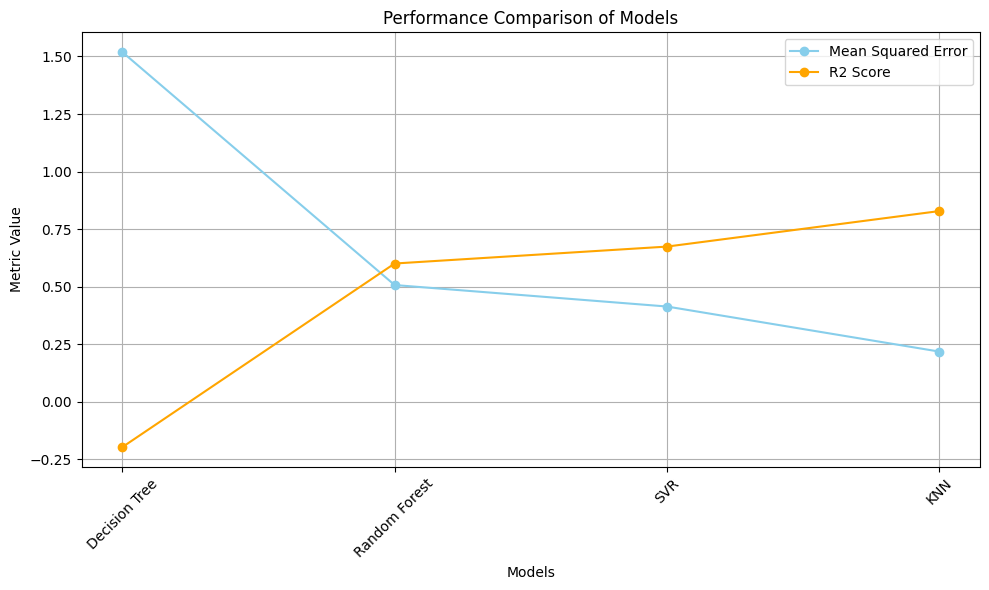

In [31]:
'''Plot models'''
import matplotlib.pyplot as plt


models = ['Decision Tree', 'Random Forest', 'SVR', 'KNN']
mean_squared_errors = [
    mean_squared_error(y_test, dtr_pred),
    mean_squared_error(y_test, rfr_pred),
    mean_squared_error(y_test, svr_pred),
    mean_squared_error(y_test, knr_pred)]
r2_scores = [
    r2_score(y_test, dtr_pred),
    r2_score(y_test, rfr_pred),
    r2_score(y_test, svr_pred),
    r2_score(y_test, knr_pred)]


plt.figure(figsize=(10, 6))
plt.plot(models, mean_squared_errors, marker='o', color='skyblue', linestyle='-', label='Mean Squared Error')
plt.plot(models, r2_scores, marker='o', color='orange', linestyle='-', label='R2 Score')
plt.title('Performance Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<h3> Optimization Techniques

In [43]:
'''Lasso Regression'''
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np


lasso_regressor = Lasso(alpha=0.01) 
lasso_regressor.fit(X_train, y_train)
lasso_pred = lasso_regressor.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Mean Squared Error:", lasso_mse)
print("Mean Absolute Error:", lasso_mae)
print("R^2 Score:", lasso_r2)


Mean Squared Error: 0.6544058191890588
Mean Absolute Error: 0.7240412487431694
R^2 Score: 0.4843061015465976


In [38]:
'''Gradient boosting'''
import xgboost

xgr = xgboost.XGBRegressor()
xgr.fit(X_train, y_train)
xgr_pred = xgr.predict(X_test)
xgr_mse = mean_squared_error(y_test, xgr_pred)
xgr_mae = mean_absolute_error(y_test, xgr_pred)
xgr_r2 = r2_score(y_test, xgr_pred)

print("Mean Squared Error:", xgr_mse)
print("Mean Absolute Error:", xgr_mae)
print("R^2 Score:", xgr_r2)


Mean Squared Error: 1.018981995831526
Mean Absolute Error: 0.7302262110538829
R^2 Score: 0.19700775501145784


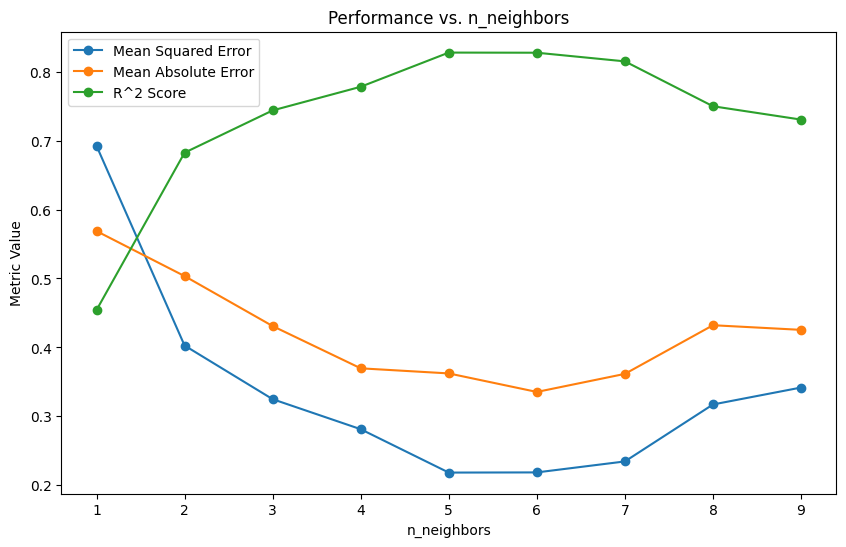

Best n_neighbors: 5
Corresponding Mean Squared Error: 0.21795900489376682


In [45]:
'''Hyperparameter tuning: KNN'''

n_values = range(1, 10)
mse_values = []
mae_values = []
r2_values = []

for n in n_values:
    knr = KNeighborsRegressor(n_neighbors=n)
    knr.fit(X_train, y_train)
    
    knr_pred = knr.predict(X_test)
    
    mse = mean_squared_error(y_test, knr_pred)
    mae = mean_absolute_error(y_test, knr_pred)
    r2 = r2_score(y_test, knr_pred)
    
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

plt.figure(figsize=(10, 6))
plt.plot(n_values, mse_values, label='Mean Squared Error', marker='o')
plt.plot(n_values, mae_values, label='Mean Absolute Error', marker='o')
plt.plot(n_values, r2_values, label='R^2 Score', marker='o')
plt.title('Performance vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

